In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/RA2_alpine_lads/ra_joint_predictions')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import os
import tensorflow as tf
import tensorflow_addons as tfa
from utils.config import Config
import dataset.NIH_pretrain_dataset as dtd
import PIL
import PIL.ImageOps
from tensorflow.keras.utils import plot_model
test_config = Config()
from tensorflow.keras.models import load_model
from model import NIH_model
import itertools
import seaborn as sns

In [3]:
# reload the library
import importlib
import types
import os

def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        importlib.reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)

reload_package(dtd)


In [4]:
model = NIH_model.create_resnet_multioutput(test_config)

In [5]:
model.load_weights("weights/NIH_new_pretrain_model_75")


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f327468f9b0> and <tensorflow.python.keras.layers.core.Dense object at 0x7f32741a7b70>).
2020-03-02 14:47:12,722;WARNING - Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f327468f9b0> and <tensorflow.python.keras.layers.core.Dense object at 0x7f32741a7b70>).


ValueError: Shapes (1,) and (32,) are incompatible

In [ ]:

dataset = dtd.pretrain_dataset_NIH_chest(test_config)
chest_dataset, chest_dataset_val = dataset.initialize_pipeline()
def split_dataset_outputs(x,y):
    return x,(tf.split(y,[1,1,14],1)[2],tf.split(y,[1,1,14],1)[1],tf.split(y,[1,1,14],1)[0])
chest_dataset3 = chest_dataset.map(split_dataset_outputs)
chest_dataset_val3 = chest_dataset_val.map(split_dataset_outputs)

In [ ]:
model.evaluate(chest_dataset_val3,steps=20)

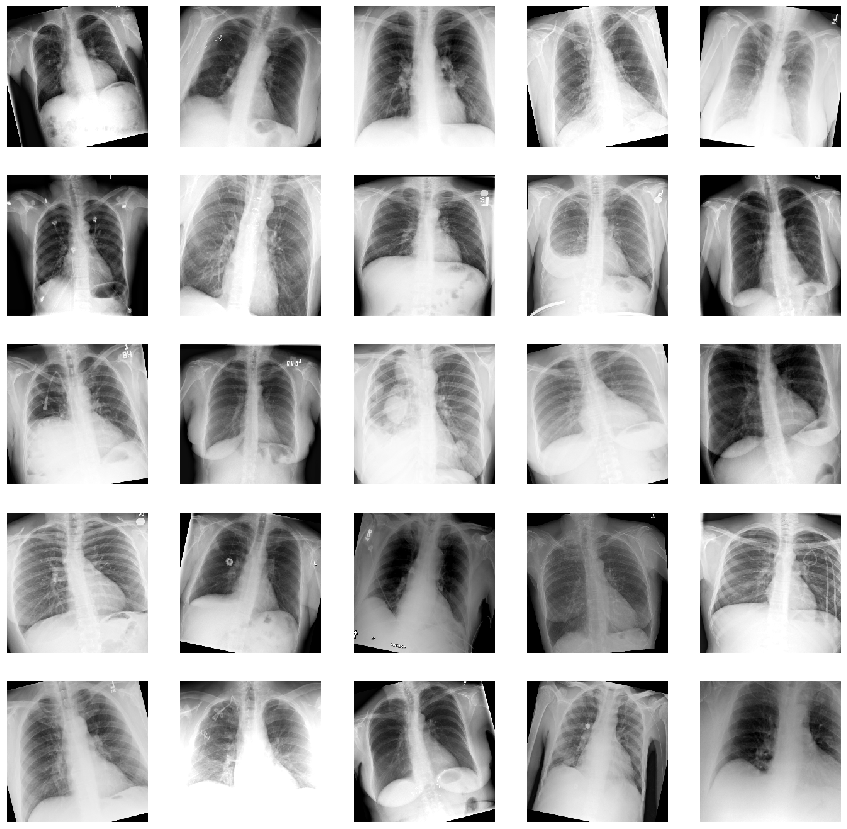

In [32]:
for a,b in chest_dataset_val3.take(1):
    plt.figure(figsize=(15,15))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :, 0],cmap="gray")
        plt.axis('off')
    #h = model.predict(a)
    #print(h)
    #print(b)
    

In [10]:
truths = [[],[],[]]
preds = [[],[],[]]
for a,b in chest_dataset_val3.take(50):
    h = model.predict(a)
    for i in range(3):
        truths[i].extend(list(itertools.chain(*np.array(b[i]).tolist())))
        preds[i].extend(list(itertools.chain(*np.array(h[i]).tolist())))
        df[df.columns[~df.columns.isin(['C','D'])]]

In [33]:
b


(<tf.Tensor: id=35859, shape=(64, 14), dtype=float64, numpy=
 array([[0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0.

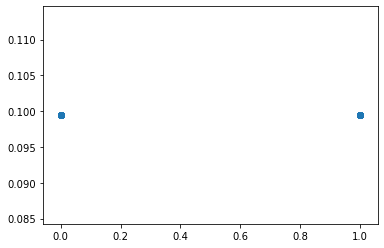

In [11]:
# age
plt.scatter(truths[2],preds[2],alpha=0.5)

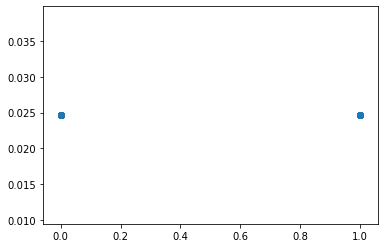

In [12]:
# sex
plt.scatter(truths[1],preds[1],alpha=0.5)

Confusion matrix, without normalization
[[3080    0]
 [ 120    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


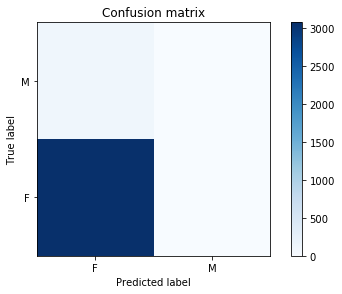

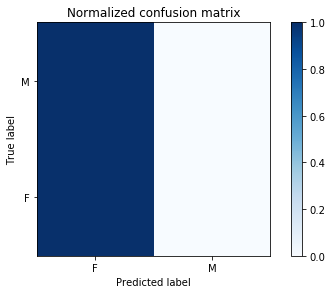

In [13]:
# sex
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0,1]
    plt.ylim(-0.5,1.5)
    plt.xticks(tick_marks, ["F","M"])
    plt.yticks(tick_marks, ["F","M"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
h_res = [1 if (x>0.5) else 0 for x in preds[1]]
cm = confusion_matrix(np.array(truths[1]).astype(int) ,h_res, labels=[0,1])

print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')



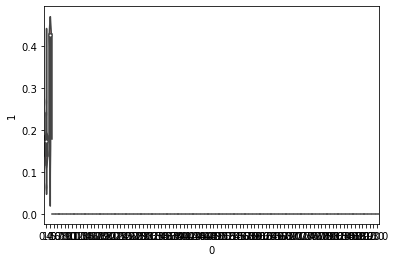

In [14]:
# disease state

disease = pd.DataFrame([truths[0],preds[0]]).T
sns.violinplot(data = disease, x=0,y=1)

In [106]:
import model.keras_nasnet
import importlib
importlib.reload(model.keras_nasnet)

<module 'model.keras_nasnet' from '/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads/model/keras_nasnet.py'>

In [111]:
NAS_7x1920 = model.keras_nasnet.NASNet(input_shape=[test_config.img_height,test_config.img_width,1], include_top=False,weights=None,
      penultimate_filters=1920,
      num_blocks=7,
      stem_block_filters=96,
      skip_reduction=False,
      filter_multiplier=2,)

In [14]:
%load_ext tensorboard

In [15]:
%tensorboard --logdir "logs/tensorboard" --port=7901

In [30]:
NASnet_model = keras.applications.NASNetMobile(input_shape=[test_config.img_height,test_config.img_width,1], include_top=False,weights=None,)

In [31]:
inputs = keras.layers.Input(shape=[test_config.img_height,test_config.img_width,1])

common_part = NASnet_model(inputs)
common_part =  tf.keras.layers.GlobalAveragePooling2D()(common_part)




In [32]:
disease_gender = keras.layers.Dense(16, activation='sigmoid', name='disease_gend_pred')(common_part)


In [33]:
age = keras.layers.Dense(1,activation="linear",name="age_pred")(common_part)

In [34]:
model = keras.models.Model(
    inputs=inputs,
    outputs=[disease_gender, age],
    name="NASnet_multiout")

In [73]:
model.summary()

Model: "NASnet_multiout"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 378, 1) 0                                            
__________________________________________________________________________________________________
NASNet (Model)                  (None, 16, 12, 1056) 4269140     input_2[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 1056)         0           NASNet[1][0]                     
__________________________________________________________________________________________________
disease_pred (Dense)            (None, 14)           14798       global_average_pooling2d[0][0]   
____________________________________________________________________________________

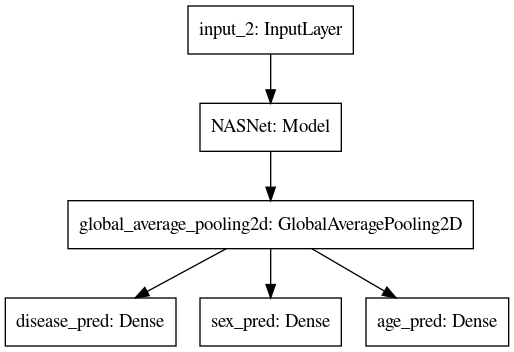

In [14]:
plot_model(model)

In [5]:
losses = {
    "disease_gend_pred": "binary_crossentropy",
    "age_pred": "mean_squared_error",
}
lossWeights = {"disease_gend_pred": 1.0, "age_pred": 0.001}



In [10]:
model.compile(optimizer='adam', loss=losses, loss_weights=lossWeights, metrics=["binary_accuracy","mae"])

In [11]:
import dataset.pretrain_dataset as dpd


In [12]:
import importlib
importlib.reload(dpd)

<module 'dataset.pretrain_dataset' from '/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads/dataset/pretrain_dataset.py'>

In [13]:
dataset = dpd.pretrain_dataset_NIH_chest(test_config)
chest_dataset, chest_dataset_val = dataset.initialize_pipeline()

In [14]:
def split_dataset_outputs(x,y):
    return x,(tf.split(y,[1,16],1)[1],tf.split(y,[1,16],1)[0])
chest_dataset3 = chest_dataset.map(split_dataset_outputs)
chest_dataset_val3 = chest_dataset_val.map(split_dataset_outputs)

In [15]:
H = model.fit(chest_dataset3, validation_data=chest_dataset_val3,
    epochs=2,steps_per_epoch=100,validation_steps=5)

Train for 100 steps, validate for 5 steps
Epoch 1/2
100/100 [==============================] - 152s 2s/step - loss: 0.8500 - disease_gend_pred_loss: 0.2553 - age_pred_loss: 594.6498 - disease_gend_pred_binary_accuracy: 0.8987 - disease_gend_pred_mae: 0.1383 - age_pred_binary_accuracy: 0.0000e+00 - age_pred_mae: 19.1574


AlreadyExistsError: 2 root error(s) found.
  (0) Already exists:  There appears to be a concurrent caching iterator running - cache lockfile already exists ('/mnt/iusers01/jw01/mdefscs4/localscratch/RA_challenge_scratchchest_val_0.lockfile'). If you are sure no other running TF computations are using this cache prefix, delete the lockfile and re-initialize the iterator. Lockfile contents: Created at: 1579985830
	 [[node IteratorGetNext (defined at /mnt/jw01-aruk-home01/projects/functional_genomics/bin/tensorflow_gpu/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
	 [[Shape/_8]]
  (1) Already exists:  There appears to be a concurrent caching iterator running - cache lockfile already exists ('/mnt/iusers01/jw01/mdefscs4/localscratch/RA_challenge_scratchchest_val_0.lockfile'). If you are sure no other running TF computations are using this cache prefix, delete the lockfile and re-initialize the iterator. Lockfile contents: Created at: 1579985830
	 [[node IteratorGetNext (defined at /mnt/jw01-aruk-home01/projects/functional_genomics/bin/tensorflow_gpu/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_90893]

Function call stack:
distributed_function -> distributed_function


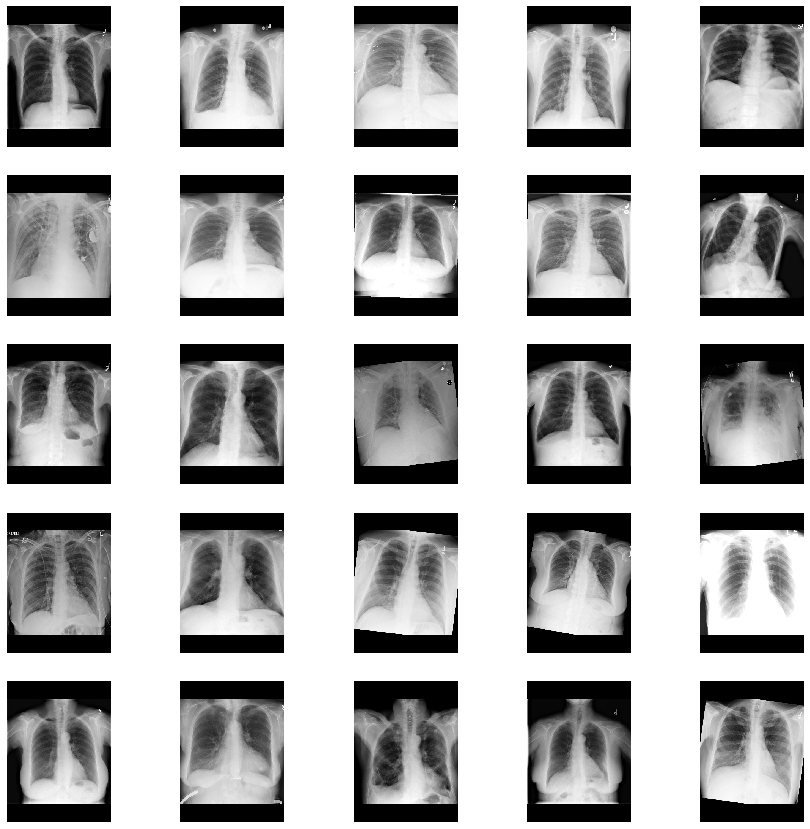

In [7]:
for a,b in chest_dataset3.take(1):
    plt.figure(figsize=(15,15))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :, 0],cmap="gray")
        plt.axis('off')